In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import matplotlib

import json
from pandas.io.json import json_normalize
from scipy.stats import zscore
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

matplotlib.rcParams['svg.fonttype'] = 'none'

## load data

In [8]:
#saline/0mg
zero_F1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/0mg_F1.csv',header=None)
zero_M1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/0mg_M1.csv',header=None)
zero_M2 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/0mg_M2.csv',header=None)
zero_M3 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/0mg_M3.csv',header=None)

#5mg/kg
five_F1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/5mg_F1.csv',header=None)
five_F2 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/5mg_F2.csv',header=None)
five_F3 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/5mg_F3.csv',header=None)
five_M1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/5mg_M1.csv',header=None)
five_M2 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/5mg_M2.csv',header=None)
five_M3 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/5mg_M3.csv',header=None)

#10mg/kg
ten_F1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/10mg_F1.csv',header=None)
ten_F2 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/10mg_F2.csv',header=None)
ten_F3 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/10mg_F3.csv',header=None)
ten_M1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/10mg_M1.csv',header=None)
ten_M2 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/10mg_M2.csv',header=None)
ten_M3 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/10mg_M3.csv',header=None)

#20mg/kg
twenty_F1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/20mg_F1.csv',header=None)
twenty_F2 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/20mg_F2.csv',header=None)
twenty_F3 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/10mg_F3.csv',header=None)
twenty_M1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/20mg_M1.csv',header=None)
twenty_M2 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/20mg_M2.csv',header=None)
twenty_M3 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/20mg_M3.csv',header=None)

#40mg/kg
forty_F1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/40mg_F1.csv',header=None)
forty_F2 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/40mg_F2.csv',header=None)
forty_F3 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/40mg_F3.csv',header=None)
forty_M1 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/40mg_M1.csv',header=None)
forty_M2 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/40mg_M2.csv',header=None)
forty_M3 = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/processed/40mg_M3.csv',header=None)

#Psilocybin
psilo_1F = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_jan_feb_2022/psilo_1F.csv',header=None)
psilo_2F = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_jan_feb_2022/psilo_2F.csv',header=None)
psilo_3F = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_jan_feb_2022/psilo_3F.csv',header=None)
psilo_1M = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_jan_feb_2022/psilo_1M.csv',header=None)
psilo_2M = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_jan_feb_2022/psilo_2M.csv',header=None)
psilo_3M = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_jan_feb_2022/psilo_3M.csv',header=None)

## preprocess data

In [9]:
#preprocess
def preprocess(data, dose, sex):
    data.columns = ['Time']
    data['Time'] = data['Time'] / 1000 / 60 # convert ms to min
    data['event'] = 1
    
    new_data=pd.DataFrame({'startTime':np.arange(120),'endTime':np.arange(120)+1}) #make time points
    s = data.Time[:,None]
    holder=(new_data.startTime.values-s<=0)&(new_data.endTime.values-s>=0)
    new_data['HTR']=data.event.dot(holder) #HTR per min
    new_data['smooth_HTR'] = new_data['HTR'].rolling(window=3).mean().shift(-2)
    new_data.drop(columns=['endTime'], inplace=True)
    new_data.rename(columns={'startTime':('Time')}, inplace=True)
    new_data['Dose'] = dose
    new_data['Sex'] = sex
    return new_data

#0mg/kg
zero_1 = preprocess(zero_F1, 0, 'Female')
zero_2 = preprocess(zero_M1, 0, 'Male')
zero_3 = preprocess(zero_M2, 0, 'Male')
zero_4 = preprocess(zero_M3, 0, 'Male')

all_zero = pd.concat([zero_1,zero_2,zero_3, zero_4])
all_zero['Normalized_HTR'] = all_zero['HTR'] /all_zero['HTR'].abs().max()

#5mg/kg
five_1 = preprocess(five_F1, 5, 'Female')
five_2 = preprocess(five_F2, 5, 'Female')
five_3 = preprocess(five_F3, 5, 'Female')
five_4 = preprocess(five_M1, 5, 'Male')
five_5 = preprocess(five_M2, 5, 'Male')
five_6 = preprocess(five_M3, 5, 'Male')

all_five = pd.concat([five_1,five_2,five_3, five_4, five_5, five_6])
all_five['Normalized_HTR'] = all_five['HTR'] /all_five['HTR'].abs().max()

#10mg/kg
ten_1 = preprocess(ten_F1, 10, 'Female')
ten_2 = preprocess(ten_F2, 10, 'Female')
ten_3 = preprocess(ten_F3, 10, 'Female')
ten_4 = preprocess(ten_M1, 10, 'Male')
ten_5 = preprocess(ten_M2, 10, 'Male')
ten_6 = preprocess(ten_M3, 10, 'Male')

all_ten = pd.concat([ten_1,ten_2,ten_3, ten_4, ten_5, ten_6])
all_ten['Normalized_HTR'] = all_ten['HTR'] /all_ten['HTR'].abs().max()

#20mg/kg
twenty_1 = preprocess(twenty_F1, 20, 'Female')
twenty_2 = preprocess(twenty_F2, 20, 'Female')
twenty_3 = preprocess(twenty_F3, 20, 'Female')
twenty_4 = preprocess(twenty_M1, 20, 'Male')
twenty_5 = preprocess(twenty_M2, 20, 'Male')
twenty_6 = preprocess(twenty_M3, 20, 'Male')

all_twenty = pd.concat([twenty_1, twenty_2, twenty_3, twenty_4, twenty_5,twenty_6])
all_twenty['Normalized_HTR'] = all_twenty['HTR'] /all_twenty['HTR'].abs().max()

#40mg/kg
forty_1 = preprocess(forty_F1, 40, 'Female')
forty_2 = preprocess(forty_F2, 40, 'Female')
forty_3 = preprocess(forty_F3, 40, 'Female')
forty_4 = preprocess(forty_M1, 40, 'Male')
forty_5 = preprocess(forty_M2, 40, 'Male')
forty_6 = preprocess(forty_M3, 40, 'Male')

all_forty = pd.concat([forty_1, forty_2, forty_3, forty_4, forty_5, forty_6])
all_forty['Normalized_HTR'] = all_forty['HTR']/all_forty['HTR'].abs().max()

#psilocybin
psi_1 = preprocess(psilo_1F, 'Psilocybin', 'Female')
psi_2 = preprocess(psilo_2F, 'Psilocybin', 'Female')
psi_3 = preprocess(psilo_3F, 'Psilocybin', 'Female')
psi_4 = preprocess(psilo_1M, 'Psilocybin', 'Male')
psi_5 = preprocess(psilo_2M, 'Psilocybin', 'Male')
psi_6 = preprocess(psilo_3M, 'Psilocybin', 'Male')

all_psi = pd.concat([psi_1, psi_2, psi_3, psi_4, psi_5, psi_6])
all_psi['Normalized_HTR'] = all_psi['HTR']/all_psi['HTR'].abs().max()

#merge all
all_5MeO_DMT = pd.concat([all_zero, all_five, all_ten, all_twenty, all_forty])
all_data = pd.concat([all_zero, all_five, all_ten, all_twenty, all_forty, all_psi])

C:\Users\Pasha\miniconda3\envs\AIBS\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


## Plotting time course

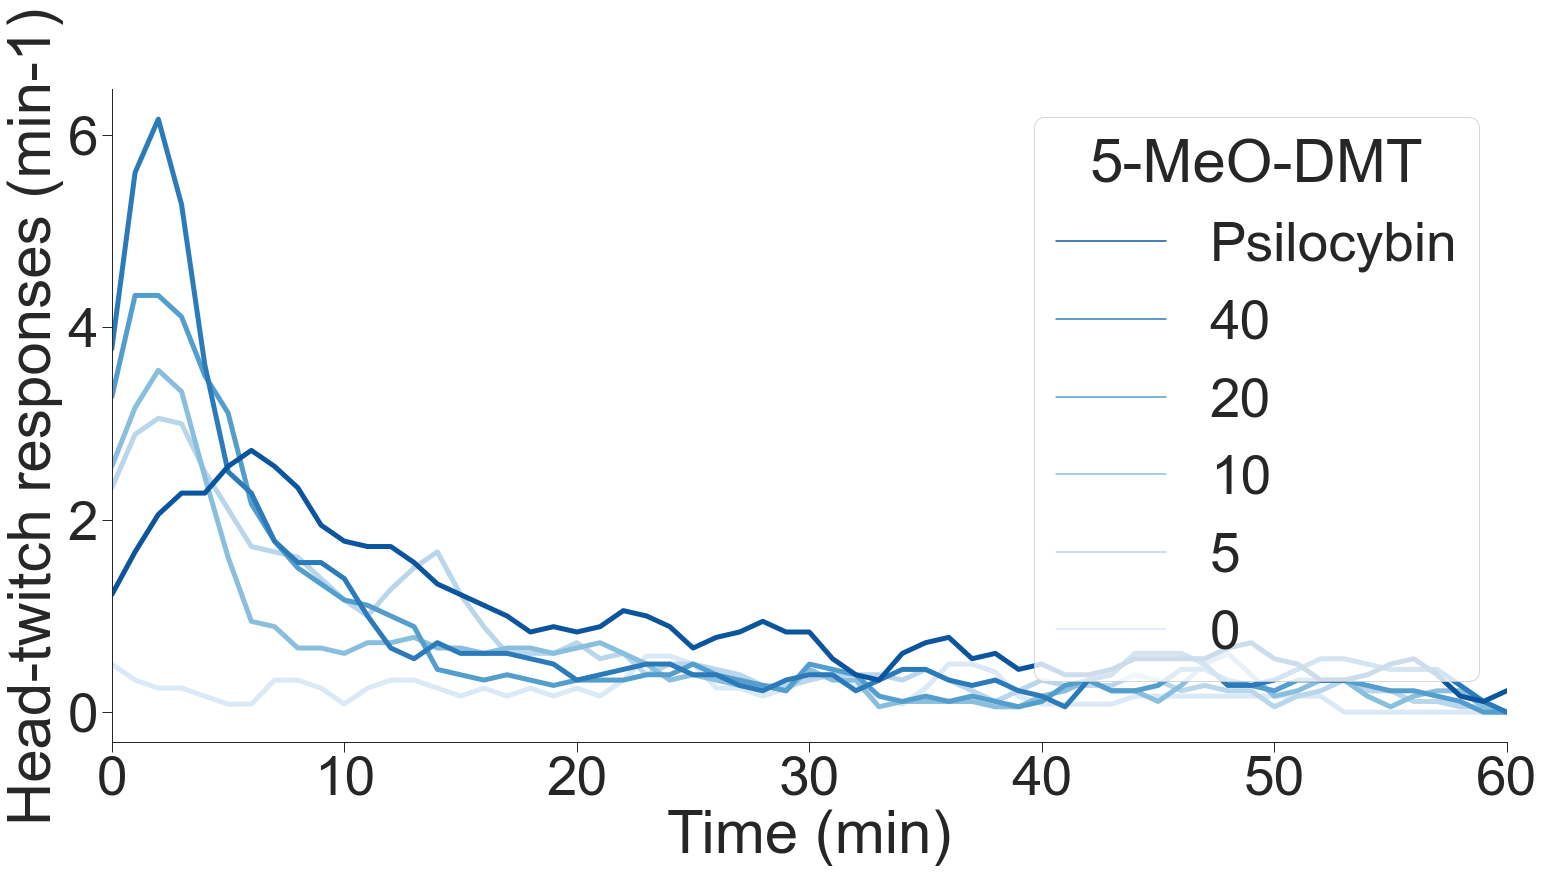

In [50]:
#setup figure
sns.set(style='ticks', font_scale=5)
plt.figure(figsize=(25,12))

#plot
custom_palette = sns.color_palette('Blues', 6)

ax = sns.lineplot(data = all_data, x='Time', y='smooth_HTR', hue = 'Dose', ci=None,
                  linewidth=5, palette=custom_palette)
# ax = sns.lineplot(data = all_psi, x='Time', y='smooth_HTR', ci=None,
#                  linewidth=5, color='red')

#clean up and save
sns.despine()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.xaxis.set_tick_params(length=10, width=1)
ax.yaxis.set_tick_params(length=10, width=1)
ax.set_xlabel("Time (min)")
ax.set_ylabel("Head-twitch responses (min-1)")
plt.xlim(0,60)

#flip legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='5-MeO-DMT', loc='upper right')

plt.savefig('C:/Users/Pasha/Downloads/all_5MeO_all_psi_2.svg',  format='svg', bbox_inches='tight')

## Calculate summary stats

In [41]:
#calculate summary stats
from scipy.signal import chirp, find_peaks, peak_widths, peak_prominences
from scipy.interpolate import interp1d


#find summary stats
def find_info(data):
    x = data['Time']
    y = data['smooth_HTR']
    
    #max value
    max_row = data.loc[data['smooth_HTR'].idxmax()]
    max_val = max_row['smooth_HTR']
    total_HTR = data['smooth_HTR'].sum()
    print ('Total HTR is:', total_HTR)
    print('Max HTR/min occurs at:', max_row['Time'], 'minutes') 
    print('Max HTR/min is:', max_val)    
    
    #FWHM
    xs = [x for x in range(30) if y[x]>max_val/2.0]
    fwhm = max(xs)-min(xs)
    fwhm_val = (y[min(xs)]+y[max(xs)])/2
    print('FWHM length is:', fwhm)
    print('FWHM value is:', fwhm_val)
    
    #info
    print('Dose:', data['Dose'][0])
    print('Sex:', data['Sex'][0])
    
    #plot
#     ax = sns.lineplot(data=smoothed_data, x=x,y=y)
#     plt.plot(max(xs), fwhm_val, 'go')
#     plt.plot(min(xs), fwhm_val, 'go')
#     #plt.axvspan(min(xs),max(xs), facecolor='red', alpha=0.5)
#     plt.xlim(0,30)


find_info(five_4)

Total HTR is: 21.333333333333336
Max HTR/min occurs at: 20 minutes
Max HTR/min is: 1.0
FWHM length is: 23
FWHM value is: 0.6666666666666666
Dose: 5
Sex: Male


### Total HTRs

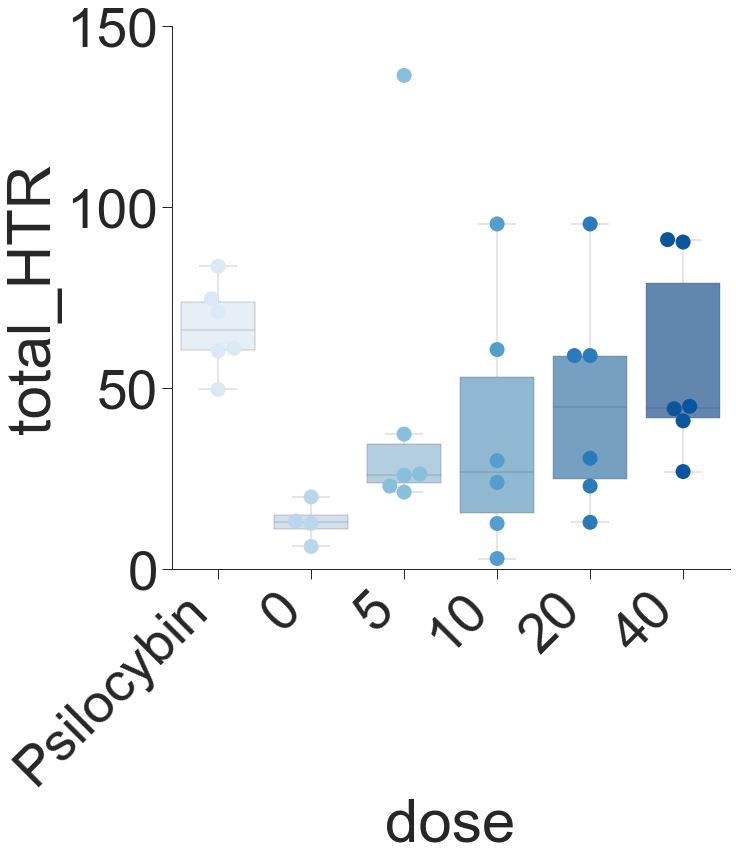

In [49]:
#get data
sums_data = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/april_summary_data.csv')
sums_data

#plotting
#setup figure
sns.set(style='ticks', font_scale=5)
plt.figure(figsize=(10,10))

custom_palette = sns.color_palette('Blues', 6)

#plot
ax = sns.boxplot(data=sums_data, x='dose', y='total_HTR',  hue = 'dose', showfliers=False, dodge=False,
                 palette=custom_palette, linewidth=0.25)

#lower opacity
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

ax = sns.swarmplot(data=sums_data, x='dose', y='total_HTR', dodge=False,
                   palette=custom_palette, size=15, linewidth=0, hue='dose')

#clean up and save
sns.despine()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.xaxis.set_tick_params(length=10, width=1)
ax.yaxis.set_tick_params(length=10, width=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, ha='right')
plt.ylim(0,150)

handles, labels = ax.get_legend_handles_labels()
plt.legend([],[], frameon=False)


plt.savefig('C:/Users/Pasha/Downloads/total_HTR2.svg',  format='svg', bbox_inches='tight')

## Time to Peak

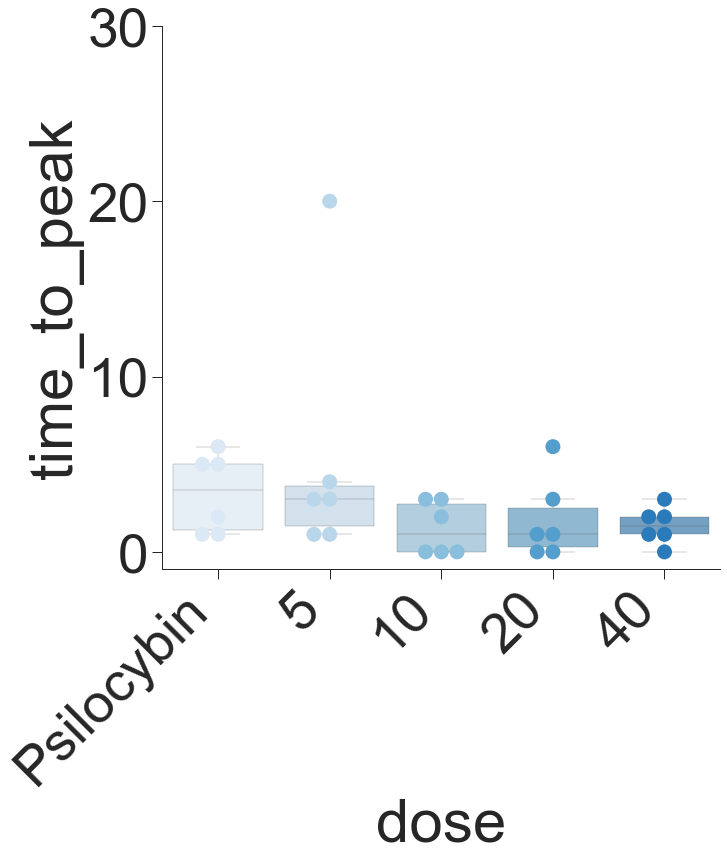

In [51]:
#get data
sums_data = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/april_summary_data.csv')
sums_data = sums_data[sums_data['dose'] != '0']

#plotting
#setup figure
sns.set(style='ticks', font_scale=5)
plt.figure(figsize=(10,10))

custom_palette = sns.color_palette('Blues', 6)

#plot
ax = sns.boxplot(data=sums_data, x='dose', y='time_to_peak',  hue = 'dose', showfliers=False, dodge=False,
                 palette=custom_palette, linewidth=0.25)

#lower opacity
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

ax = sns.swarmplot(data=sums_data, x='dose', y='time_to_peak', dodge=False,
                   palette=custom_palette, size=15, linewidth=0, hue='dose')

#clean up and save
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.xaxis.set_tick_params(length=10, width=1)
ax.yaxis.set_tick_params(length=10, width=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, ha='right')
plt.ylim(-1,30)
sns.despine()


plt.legend([],[], frameon=False)


plt.savefig('C:/Users/Pasha/Downloads/timetopeak2.svg',  format='svg', bbox_inches='tight')

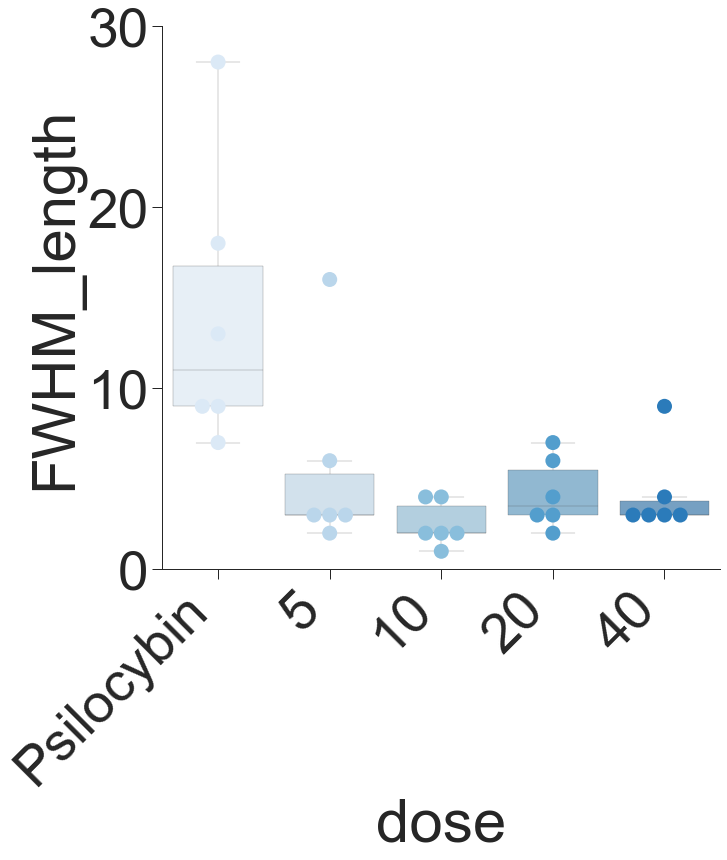

In [52]:
#get data
sums_data = pd.read_csv('C:/Users/Pasha/Documents/HTR_data_march_april_5MeODMT/april_summary_data.csv')
sums_data = sums_data[sums_data['dose'] != '0']

#plotting
#setup figure
sns.set(style='ticks', font_scale=5)
plt.figure(figsize=(10,10))

custom_palette = sns.color_palette('Blues', 6)

#plot
ax = sns.boxplot(data=sums_data, x='dose', y='FWHM_length',  hue = 'dose', showfliers=False, dodge=False,
                 palette=custom_palette, linewidth=0.25)

#lower opacity
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

ax = sns.swarmplot(data=sums_data, x='dose', y='FWHM_length', dodge=False,
                   palette=custom_palette, size=15, linewidth=0, hue='dose')

#clean up and save
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.xaxis.set_tick_params(length=10, width=1)
ax.yaxis.set_tick_params(length=10, width=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, ha='right')
plt.ylim(0,30)
sns.despine()


plt.legend([],[], frameon=False)


plt.savefig('C:/Users/Pasha/Downloads/duration2.svg',  format='svg', bbox_inches='tight')